In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import gurobipy as gb
from gurobipy import GRB

In [ ]:
DataX = pd.read_csv("Feature_selected.csv",index_col=0)
DataY = pd.read_csv("Processed_data.csv")['Actual']

#Data split into Test and Train:
X_train, X_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.25, shuffle = False)


prices_df = pd.read_csv("Prices_processed.csv",index_col =0).round(2)
prices_train, prices_test = train_test_split(prices_df, test_size=0.25, shuffle = False)

# L1 Regularization (Lasso) 

In [ ]:
# Create a regression model with L1 regularization included (this is implementation is just here to manually test different values of alpha)
alpha = 0.01  # Gives an initial value for the parameter
lasso_model = Lasso(alpha=alpha) # Creates a Lasso regression model

lasso_model.fit(X_train, y_train) #Trains the Lasso model using the training data.

test_score = lasso_model.score(X_test, y_test) #Calculates and stores the R^2 
print(f"Test R^2 Score: {test_score}")

Test R^2 Score: 0.5879035763059168


## Cross Validation for Lasso: Testing different values of alpha

In [ ]:
# Define the Lasso Regression model
lasso_model = Lasso()

# Define a range of alpha values to test
alphas = np.logspace(-6, 6, 13) 

#Define the 5 fold time-series cross validation
kfold = TimeSeriesSplit(n_splits=5)

In [ ]:
lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

# Defines a parameter grid for hyperparameter tuning.
param_grid = { "fit_intercept" :[True,False],  "alpha": alphas}

# Sets up a GridSearchCV object, which will perform hyperparameter tuning for the Lasso model.
lassoCV  = GridSearchCV(estimator = lasso_model, cv=TimeSeriesSplit(n_splits=5),param_grid = param_grid, return_train_score = True)
lassoCV.fit(X_train, y_train)  #Fits the GridSearchCV object to the training data
best_lassoCV = lassoCV.best_estimator_ #Retrieves the best estimator (Lasso model) found during the hyperparameter tuning process and assigns it to the variable

c:\Users\YAF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e+01, tolerance: 3.669e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\YAF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.495e+01, tolerance: 5.902e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\YAF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

In [ ]:
print(best_lassoCV)
#Calculates the R^2 score between the true target values y_test and the predicted values y_pred_cv using the best Lasso model.
y_pred_cv = best_lassoCV.predict(X_test)
y_pred_cv1 = y_pred_cv 
print(r2_score(y_test,y_pred_cv))

Lasso(alpha=0.001)
0.751694642514054


### Evaluation of the performance of the L1-regularized model with the best value for alpha on the testing dataset

In [ ]:
alpha = 0.001  # Implement the value of alpha previously found
lasso_model = Lasso(alpha=alpha)

lasso_model.fit(X_train, y_train)


test_score = lasso_model.score(X_test, y_test)
print(f"Test R^2 Score: {test_score}")

#Retrieves the coefficients of the features learned by the Lasso model.
lasso_coeffs = lasso_model.coef_
print("Lasso Coefficients:")
print("______________________")
# which features are considered important (non-zero coefficients) and which are effectively removed (zero coefficients) by Lasso regularization, providing insights into feature selection
print("Penalization of the coefficients:")
for feature, coef in zip(X_test.columns, lasso_coeffs):
    print(f"{feature}: {coef}")


Test R^2 Score: 0.751694642514054
Lasso Coefficients:
______________________
Penalization of the coefficients:
bright_sunshine: -0.014977490594918243
max_temp_w_date: -0.0
max_wind_speed_3sec: 0.8580932674981759
mean_pressure: -0.13760476639181182
mean_radiation_Lag1: -0.11232642751248023
mean_wind_speed_Lag1: 0.16242507636000625
temp_grass_Lag1: -0.1317494164162237
bright_sunshine_Lag2: -0.03512620123303098
max_wind_speed_3sec_Lag3: 0.34788609360627415
mean_pressure_Lag3: -0.0


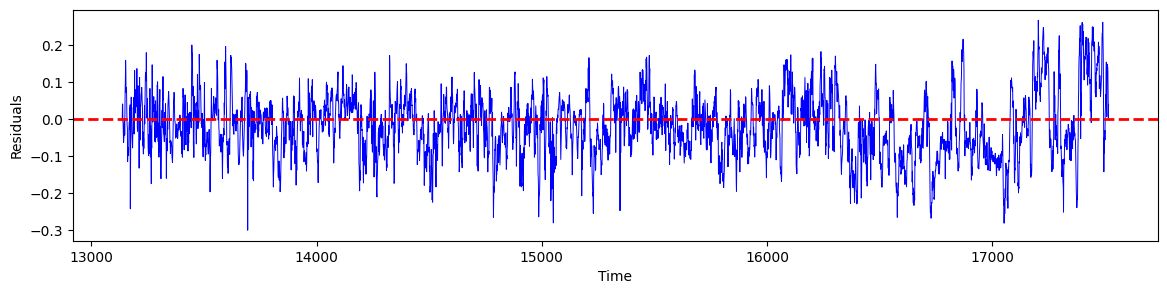

Under predicting: -187.5873715686707
Over predicting: 110.50380746384145


In [ ]:
residuals = y_test - y_pred_cv

plt.figure(figsize=(14, 3))
plt.plot(y_test.index , residuals,lw=0.7, c='b')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Time')
plt.ylabel('Residuals')
#plt.title('Residual Plot using Linear Regression including L1 Regularization')
plt.show()
plt.show()

print('Under predicting:',sum(residuals[residuals<0]))
print('Over predicting:',sum(residuals[residuals>0]))

# L2 Regularization (Ridge)

In [ ]:
#Define Ridge model:
ridge_model = Ridge()

# Define a range of alpha values to test
alphas = np.logspace(-6, 6, 13) 

#Define the 5 fold cross validation
kfold = TimeSeriesSplit(n_splits=5)

### Cross Validation for Lasso: Testing different values of alpha

In [ ]:
ridge_model = Ridge()

ridge_model.fit(X_train, y_train)

param_grid = { "fit_intercept" :[True,False],  "alpha": alphas}

ridgeCV  = GridSearchCV(estimator = ridge_model, cv=TimeSeriesSplit(n_splits=5),param_grid = param_grid, return_train_score = True)
ridgeCV.fit(X_train, y_train)
best_ridgeCV = ridgeCV.best_estimator_

In [ ]:
print(best_ridgeCV)
y_pred_cv = best_ridgeCV.predict(X_test)
y_pred_cv2 = y_pred_cv 
print(r2_score(y_test,y_pred_cv))

Ridge(alpha=10.0)
0.752054248323702


### Evaluation of the performance of the L2-regularized model with the best value for alpha on the testing dataset

In [ ]:
alpha = 10  # Implement the value of alpha previously found
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)

test_score = ridge_model.score(X_test, y_test)
print(f"Test R^2 Score: {test_score}")

#Retrieves the coefficients of the features learned by the Ridge model.
ridge_coeffs = ridge_model.coef_
print("Ridge Coefficients:")
print("______________________")
# which features are considered important (non-zero coefficients) and which are effectively removed (zero coefficients) by Lasso regularization, providing insights into feature selection
print("Penalization of the coefficients:")
for feature, coef in zip(X_test.columns, ridge_coeffs):
    print(f"{feature}: {coef}")

Test R^2 Score: 0.752054248323702
Ridge Coefficients:
______________________
Penalization of the coefficients:
bright_sunshine: -0.011220555087189736
max_temp_w_date: 0.07612779699668278
max_wind_speed_3sec: 0.7102819542489566
mean_pressure: -0.21675808846005815
mean_radiation_Lag1: -0.1147900922536981
mean_wind_speed_Lag1: 0.3201973243736424
temp_grass_Lag1: -0.24155479192109616
bright_sunshine_Lag2: -0.034363489938809236
max_wind_speed_3sec_Lag3: 0.36206321437311645
mean_pressure_Lag3: 0.03405974125266514


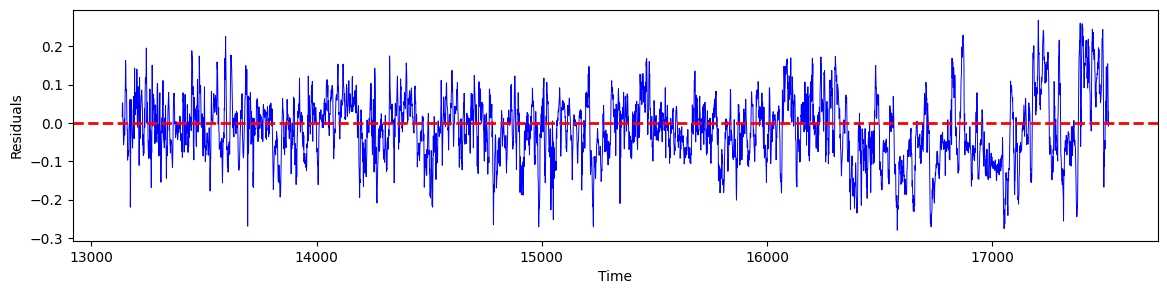

Under predicting: -183.05818377232836
Over predicting: 114.11219218208372


In [ ]:
residuals = y_test - y_pred_cv

plt.figure(figsize=(14, 3))
plt.plot(y_test.index , residuals,lw=0.7, c='b')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Time')
plt.ylabel('Residuals')
#plt.title('Residual Plot using Linear Regression including L2 Regularization')
plt.show()
plt.show()

print('Under predicting:',sum(residuals[residuals<0]))
print('Over predicting:',sum(residuals[residuals>0]))

# Revenue Calculations

In [ ]:
def Optimization_wind(Windspeed,prices):
    #Windspeed = Windspeed.to_numpy()
    Time = len(Windspeed)
    T = range(Time)

    DA_prices = prices["SpotPriceEUR"].to_numpy()
    Up_prices = prices["Up-regulating_price"].to_numpy()
    Down_prices = prices["Down-regulating_price"].to_numpy()
    Capacity = 1 

    psi_up= Up_prices -DA_prices
    psi_down = DA_prices- Down_prices

    model_opt = gb.Model("Step1_A")
    p_DA_A = model_opt.addVars(Time,lb=0)
    p_delt = model_opt.addVars(Time,lb=-gb.GRB.INFINITY,ub=gb.GRB.INFINITY)

    p_E_up = model_opt.addVars(Time,lb =-1,ub=0)
    p_E_down = model_opt.addVars(Time,lb =0,ub=1)

    model_opt.setObjective(
    gb.quicksum(p_DA_A[t]*DA_prices[t] 
            + (Up_prices[t] *  p_E_up[t] + Down_prices[t] *  p_E_down[t]) for t in T )
            ,gb.GRB.MAXIMIZE)

    
    model_opt.addConstrs(
    (p_DA_A[t] <= Capacity
    for t in T
    )
    )

    model_opt.addConstrs(
    (
    p_delt[t] == Windspeed[t]-p_DA_A[t]
    for t in T
    )
    )

    model_opt.addConstrs(
    (
    p_delt[t] == p_E_up[t] + p_E_down[t]
    for t in T
    )
    )

    model_opt.setParam('OutputFlag', False )
    model_opt.optimize()
    if model_opt.status == GRB.OPTIMAL:
        obj_val =  model_opt.objVal 
        print("Revenue =", "{:.2f}".format(model_opt.objVal))
        print("Offering Strategy =", ["{:.2f}".format(p_DA_A[t].x) for t in T])
        print("Imbalance Power =", ["{:.2f}".format(p_delt[t].x) for t in T])
        print("Real Power  =", ["{:.2f}".format(Windspeed[t]) for t in T])
        P_DA = [p_DA_A[t].x for t in T]
        obj_vals_hour ={t: p_DA_A[t].x*DA_prices[t] - (Up_prices[t] *  p_E_up[t].x + Down_prices[t] *  p_E_down[t].x) for t in T }

        p_E_up_list =[p_E_up[t].x for t in T]
        p_E_down_list = [p_E_down[t].x for t in T]


    else:
        print("Optimization was not successful")

    return P_DA,obj_val,obj_vals_hour,p_E_up_list,p_E_down_list

In [ ]:
def balancing_revenue(P_DA_bid, real_wind, prices):
    """
    Inputs: 
    P_DA_bid = The Day ahead bids that have been made by optimization program at time t 
    real_wind = The actual power produced by wind turbine at time t         
    prices = The prices time 


    Calculates the result of our day ahead bids based on our wind forecast 

    Outputs: 
    Revenue: The actual revenue by our prediction of day ahead bids
    p_up: The upregulation power needed to be provided
    p_down: The downregulation power able to provided 

    """
    Time = len(P_DA_bid)
    T = range(Time)
    real_wind = real_wind.values
    DA_prices = prices["SpotPriceEUR"].to_numpy()
    Up_prices = prices["Up-regulating_price"].to_numpy()
    Down_prices = prices["Down-regulating_price"].to_numpy()
    p_up = np.empty(Time)
    p_down = np.empty(Time)
 
    for t in T:
        
        
        if real_wind[t] <= P_DA_bid[t] :
            p_up[t] = real_wind[t] -P_DA_bid[t]
        else:
            p_up[t] = 0
        if real_wind[t] >= P_DA_bid[t] :
            p_down[t] = real_wind[t] - P_DA_bid[t]
        else:
            p_down[t] = 0
    
    Revenue = np.dot(P_DA_bid,DA_prices) + np.dot(p_up,Up_prices) + np.dot(p_down,Down_prices)   
    
    return Revenue, p_up,p_down

In [ ]:
DataY_vals = y_pred_cv1
# Change values to be between 0 and 1 at min and max
DataY_vals[DataY_vals<0] =0
DataY_vals[DataY_vals>1] =1
M1_P_DA_vals,M1_obj_val, M1_obj_vals_hour,M1_p_E_up_list,M1_p_E_down_list = Optimization_wind(DataY_vals,prices_test)
M1_Revenue, M1_p_up, M1_p_down = balancing_revenue(M1_P_DA_vals, y_test, prices_test)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-07
Revenue = 531144.96
Offering Strategy = ['1.00', '0.22', '1.00', '0.24', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.27', '0.22', '0.21', '0.27', '0.21', '1.00', '0.00', '0.22', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '1.00', '0.28', '0.00', '0.00', '0.26', '0.25', '0.00', '0.35', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.40', '0.39', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '0.0

In [ ]:
M1_Revenue

500092.9240296709

In [ ]:
DataY_vals = y_pred_cv2
# Change values to be between 0 and 1 at min and max
DataY_vals[DataY_vals<0] =0
DataY_vals[DataY_vals>1] =1
M2_P_DA_vals,M2_obj_val, M2_obj_vals_hour,M2_p_E_up_list,M2_p_E_down_list = Optimization_wind(DataY_vals,prices_test)
M2_Revenue, M2_p_up, M2_p_down = balancing_revenue(M2_P_DA_vals, y_test, prices_test)

Revenue = 528714.19
Offering Strategy = ['1.00', '0.20', '1.00', '0.23', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.26', '0.22', '0.20', '0.25', '0.20', '1.00', '0.00', '0.20', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '1.00', '0.26', '0.00', '0.00', '0.24', '0.24', '0.00', '0.33', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.40', '0.39', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '0.00', '0.26', '0.27', '0.23', '0.21', '0.18', '0.22', '1.00', '0.26', '0.29', '0.32', '0.28',

In [ ]:
M2_Revenue

499774.8529581373

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=538942fa-4593-4d1a-b90d-2d23669fe78c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>